In [1]:
import pandas as pd 
import numpy as np 
from dcapy import dca
from dcapy.models import Well, Period, Scenario, WellsGroup, CashFlow, model_from_dict
from dcapy.weiner import Brownian, GeometricBrownian, MeanReversion
import seaborn as sns 
from datetime import date
import matplotlib.pyplot as plt
import copy
import yaml
import json
from scipy import stats

In [2]:
with open('FDP_example1.yml','r') as file:
    lp_dict = yaml.load(file)

<ipython-input-2-5ea6399cb761>:2: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  lp_dict = yaml.load(file)


In [3]:
lp = model_from_dict(lp_dict)

print(type(lp))

<class 'dcapy.models.schedule.WellsGroup'>


In [4]:
sc = lp.scenarios_maker()
sc

[{'LP2': ['base'],
  'LP3': ['base'],
  'LP4': ['base'],
  'LP5': ['base'],
  'well-1': ['highfr'],
  'well-2': ['highfr']},
 {'LP2': ['base'],
  'LP3': ['base'],
  'LP4': ['base'],
  'LP5': ['base'],
  'well-1': ['mediumfr'],
  'well-2': ['highfr']},
 {'LP2': ['base'],
  'LP3': ['base'],
  'LP4': ['base'],
  'LP5': ['base'],
  'well-1': ['highfr'],
  'well-2': ['mediumfr']},
 {'LP2': ['base'],
  'LP3': ['base'],
  'LP4': ['base'],
  'LP5': ['base'],
  'well-1': ['mediumfr'],
  'well-2': ['mediumfr']}]

<AxesSubplot:xlabel='date', ylabel='oil_rate'>

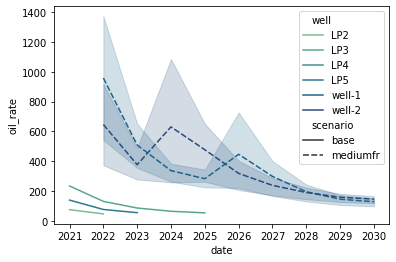

In [5]:
#fwn= lp.generate_forecast(wells={'well-1':['mediumfr'],'well-2':['mediumfr']},freq_output='A')
fwn= lp.generate_forecast(wells=sc[3],freq_output='A')

#fwn
sns.lineplot(data=fwn, x=fwn.index.to_timestamp(), y='oil_rate', hue='well',style='scenario',palette='crest')


   date  iteration     oil_rate    water_rate
0  2021          0   513.978978  20765.908069
1  2022          0  1164.104503  18321.323176
2  2022          1  1606.058199   4393.941801
3  2022          2  2291.475503   3708.524497
4  2023          0  1271.490835  16996.220760


<AxesSubplot:xlabel='date', ylabel='water_rate'>

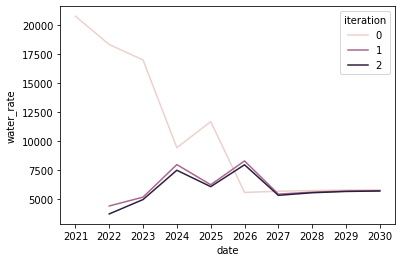

In [6]:
fwn_g = fwn.reset_index().groupby(['date','iteration'])[['oil_rate','water_rate']].sum().reset_index()
print(fwn_g.head())
sns.lineplot(data=fwn_g, x=fwn_g['date'].dt.to_timestamp(), y='water_rate', hue='iteration')

In [7]:
fwn.groupby(['well','iteration'])['oil_volume'].sum()

well    iteration
LP2     0            2.067538e+04
LP3     0            1.748805e+05
LP4     0            1.712911e+04
LP5     0            7.360141e+04
well-1  0            8.385741e+05
        1            1.287779e+06
        2            1.701089e+06
well-2  0            8.700431e+05
        1            1.299569e+06
        2            1.706589e+06
Name: oil_volume, dtype: float64

In [8]:
#cwn= lp.generate_cashflow(wells={'well-1':['mediumfr'],'well-2':['mediumfr']},freq_output='A')
cwn= lp.generate_cashflow(wells=sc[3],freq_output='A')

In [9]:


fcf_0= cwn[0].fcf()
fcf_0

,income_fdp_field-LP2-base-pdp,income_fdp_field-LP3-base-pdp,income_fdp_field-LP4-base-pdp,income_fdp_field-LP5-base-pdp,income_fdp_field-well-1-mediumfr-uppermir,income_fdp_field-well-1-mediumfr-lowermir,income_fdp_field-well-2-mediumfr-lowermir,income_fdp_field-well-2-mediumfr-uppermir,total_income,fix_opex_fdp_field-LP2-base-pdp,...,capex_drill_fdp_field-well-1-mediumfr-uppermir,capex_wo_fdp_field-well-1-mediumfr-lowermir,capex_abandon_fdp_field-well-1-mediumfr-lowermir,capex_drill_fdp_field-well-2-mediumfr-lowermir,capex_wo_fdp_field-well-2-mediumfr-uppermir,capex_abandon_fdp_field-well-2-mediumfr-uppermir,buy,total_capex,fcf,cum_fcf
2021,1.119039e+06,3.531522e+06,945526.852134,2.093743e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.689831e+06,-132000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-7500000.0,-7700000.0,-1.652637e+06,-1.652637e+06
2022,2.224184e+04,2.608459e+06,0.000000,1.512892e+06,1.091360e+07,0.000000e+00,7.489447e+06,0.000000e+00,2.254664e+07,-132000.0,...,-4000000.0,0.0,0.0,-4000000.0,0.0,0.0,0.0,-8200000.0,1.041901e+07,8.766371e+06
2023,0.000000e+00,1.710108e+06,0.000000,4.561624e+05,7.157184e+06,0.000000e+00,4.171817e+06,1.091360e+07,2.440887e+07,0.0,...,0.0,0.0,0.0,0.0,-600000.0,0.0,0.0,-800000.0,1.941135e+07,2.817772e+07
2024,0.000000e+00,1.273939e+06,0.000000,0.000000e+00,5.284740e+06,0.000000e+00,0.000000e+00,7.173708e+06,1.373239e+07,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.134619e+07,3.952391e+07
2025,0.000000e+00,5.293746e+05,0.000000,0.000000e+00,2.706778e+06,7.489447e+06,0.000000e+00,5.268215e+06,1.599381e+07,0.0,...,0.0,-600000.0,0.0,0.0,0.0,0.0,0.0,-800000.0,1.234787e+07,5.187178e+07
2026,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,4.658164e+06,0.000000e+00,4.153018e+06,8.811182e+06,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.270199e+06,5.914198e+07
2027,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,3.346189e+06,0.000000e+00,3.420057e+06,6.766245e+06,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.521630e+06,6.466361e+07
2028,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,2.606768e+06,0.000000e+00,2.910717e+06,5.517484e+06,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.453849e+06,6.911746e+07
2029,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,2.121116e+06,0.000000e+00,2.519336e+06,4.640451e+06,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.703922e+06,7.282138e+07
2030,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,5.307157e+03,0.000000e+00,6.465647e+03,1.177280e+04,0.0,...,0.0,0.0,-200000.0,0.0,0.0,-200000.0,0.0,-400000.0,-6.539334e+05,7.216745e+07


In [10]:
lp.npv([0.1,0.15,0.18], freq_rate='A', freq_cashflow='A')/1e6

,npv,iteration
0.10,52.187089,0.000000
0.15,45.306401,0.000000
0.18,41.851878,0.000000
0.10,81.668906,0.000001
0.15,70.779593,0.000001
0.18,65.343469,0.000001
0.10,111.028576,0.000002
0.15,96.827601,0.000002
0.18,89.708871,0.000002


/home/scuervo/Documents/dev/apps/dcapy/dcapy/models/cashflow.py:323: UserWarning: FixedFormatter should only be used together with FixedLocator
  grax.set_yticklabels([fmt.format(i/format_dict[format]['factor']) for i in ticks])
/home/scuervo/Documents/dev/apps/dcapy/dcapy/models/cashflow.py:331: UserWarning: FixedFormatter should only be used together with FixedLocator
  spax.set_yticklabels([fmt.format(i/format_dict[format]['factor']) for i in ticks_cum])


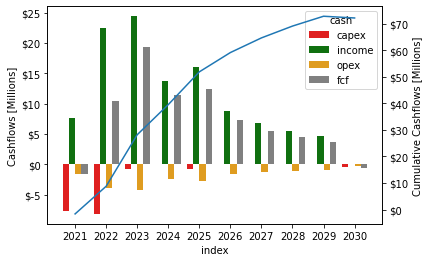

In [11]:
cwn[0].plot(cum=True,format='m')

In [12]:
cwn[0].get_cashflow_period()

,index,cash,value
0,2021,capex,-7.700000e+06
1,2021,income,7.689831e+06
2,2021,opex,-1.642468e+06
3,2022,capex,-8.200000e+06
4,2022,income,2.254664e+07
5,2022,opex,-3.927629e+06
6,2023,capex,-8.000000e+05
7,2023,income,2.440887e+07
8,2023,opex,-4.197517e+06
9,2024,income,1.373239e+07


# Weiner

In [13]:
oil_gb = GeometricBrownian(
    initial_condition = 60,
    ti = date(2021,1,1),
    generator = {'dist':'norm','kw':{'loc':0,'scale':0.26}},
    drift = 0.01,
    freq = 'A'
)

<AxesSubplot:>

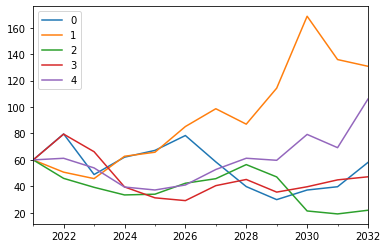

In [14]:
price_gb = oil_gb.generate(12,5, freq_output='A')

price_gb.plot()

In [15]:
oil_mr = MeanReversion(
    initial_condition = 60,
    ti = date(2021,1,1),
    generator = {'dist':'norm','kw':{'loc':0,'scale':13.13}},
    m=46.77,
    eta=0.112652,
    freq = 'A'
)

<AxesSubplot:>

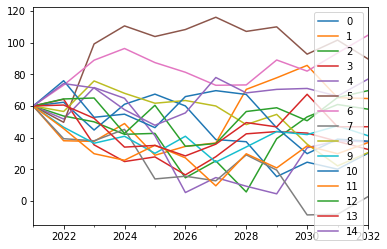

In [16]:
price_mr = oil_mr.generate(12,15, freq_output='A')

price_mr.plot()